C:\Users\pupad\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\pupad\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\pupad\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\pupad\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. 

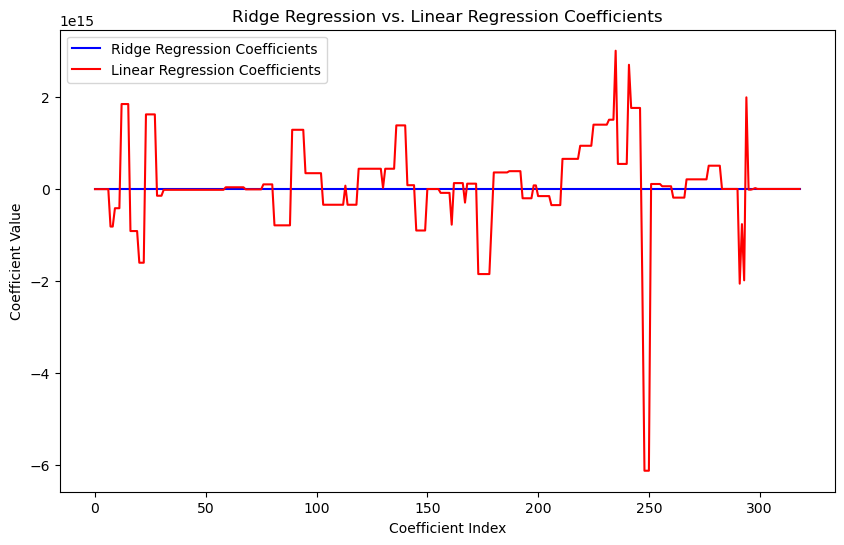

In [1]:
!pip install --upgrade scikit-learn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_selector, ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer  # Corrected import
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.model_selection import cross_val_score


ames = pd.read_csv('C:/Users/pupad/Downloads/AmesHousing.csv')  # Replace 'ames_dataset.csv' with the actual dataset file

# Separate features and target
X = ames.drop(["SalePrice", "Order", "PID"], axis=1)
y = ames["SalePrice"]
y = y[X.index]

# Create a pipeline for Ridge Regression with imputation
ct = ColumnTransformer(
    [
        ("dummify", OneHotEncoder(sparse=False, handle_unknown='ignore'), make_column_selector(dtype_include=object)),
        ("impute_and_standardize", Pipeline([
            ("imputer", SimpleImputer(strategy='mean')),
            ("scaler", StandardScaler())
        ]), make_column_selector(dtype_include=np.number))
    ],
    remainder="passthrough"
)

ridge_pipeline = Pipeline([
    ("preprocessing", ct),
    ("ridge_regression", Ridge(alpha=1.0))
])

# Cross-validate the Ridge Regression pipeline
ridge_scores = cross_val_score(ridge_pipeline, X, y, cv=5, scoring='neg_mean_squared_error')
ridge_rmse = np.sqrt(-ridge_scores)

# Fit Ridge Regression on the whole dataset and get coefficients
ridge_pipeline.fit(X, y)
ridge_coefs = ridge_pipeline.named_steps['ridge_regression'].coef_

# Fit Ordinary Linear Regression on the whole dataset and get coefficients
lr_pipeline = Pipeline([
    ("preprocessing", ct),
    ("linear_regression", LinearRegression())
])
lr_pipeline.fit(X, y)
lr_coefs = lr_pipeline.named_steps['linear_regression'].coef_

# Plot coefficients for Ridge Regression vs. Ordinary Linear Regression
plt.figure(figsize=(10, 6))
plt.plot(ridge_coefs, label="Ridge Regression Coefficients", color='blue')
plt.plot(lr_coefs, label="Linear Regression Coefficients", color='red')
plt.xlabel("Coefficient Index")
plt.ylabel("Coefficient Value")
plt.legend()
plt.title("Ridge Regression vs. Linear Regression Coefficients")
plt.show()


In [2]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'ridge_regression__alpha': [0.001, 0.01, 0.1, 1, 10]
}
grid_search = GridSearchCV(ridge_pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X, y)
best_alpha = grid_search.best_params_['ridge_regression__alpha']
best_ridge_estimator = grid_search.best_estimator_
print("Best Alpha:", best_alpha)

C:\Users\pupad\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\pupad\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\pupad\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\pupad\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. 

Best Alpha: 10


C:\Users\pupad\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [3]:
from sklearn.linear_model import Lasso

lasso_pipeline = Pipeline([
    ("preprocessing", ct),
    ("lasso_regression", Lasso(alpha=1.0))  # You can adjust the alpha (regularization strength) as needed
])
param_grid = {
    'lasso_regression__alpha': [0.001, 0.01, 0.1, 1, 10]
}

lasso_grid_search = GridSearchCV(lasso_pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')
lasso_grid_search.fit(X, y)
best_alpha_lasso = lasso_grid_search.best_params_['lasso_regression__alpha']
best_lasso_estimator = lasso_grid_search.best_estimator_
best_lasso_estimator.fit(X, y)
ridge_coefs = best_ridge_estimator.named_steps['ridge_regression'].coef_
lasso_coefs = best_lasso_estimator.named_steps['lasso_regression'].coef_
ols_coefs = lr_coefs  


C:\Users\pupad\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\pupad\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.933e+11, tolerance: 1.414e+09
  model = cd_fast.enet_coordinate_descent(
C:\Users\pupad\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\pupad\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: Convergenc

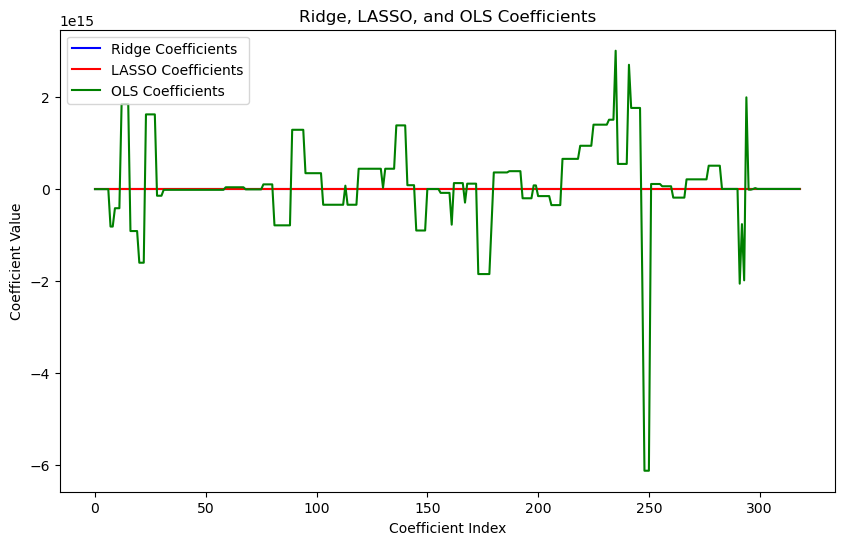

In [4]:
import matplotlib.pyplot as plt

# Create a function to plot coefficients
def plot_coefficients(coefs, model_name, color):
    plt.plot(coefs, label=f"{model_name} Coefficients", color=color)

# Plot coefficients for Ridge, LASSO, and OLS
plt.figure(figsize=(10, 6))
plot_coefficients(ridge_coefs, "Ridge", 'blue')
plot_coefficients(lasso_coefs, "LASSO", 'red')
plot_coefficients(ols_coefs, "OLS", 'green')

plt.xlabel("Coefficient Index")
plt.ylabel("Coefficient Value")
plt.legend()
plt.title("Ridge, LASSO, and OLS Coefficients")
plt.show()


C:\Users\pupad\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\pupad\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.122e+11, tolerance: 1.414e+09
  model = cd_fast.enet_coordinate_descent(
C:\Users\pupad\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\pupad\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: Convergenc

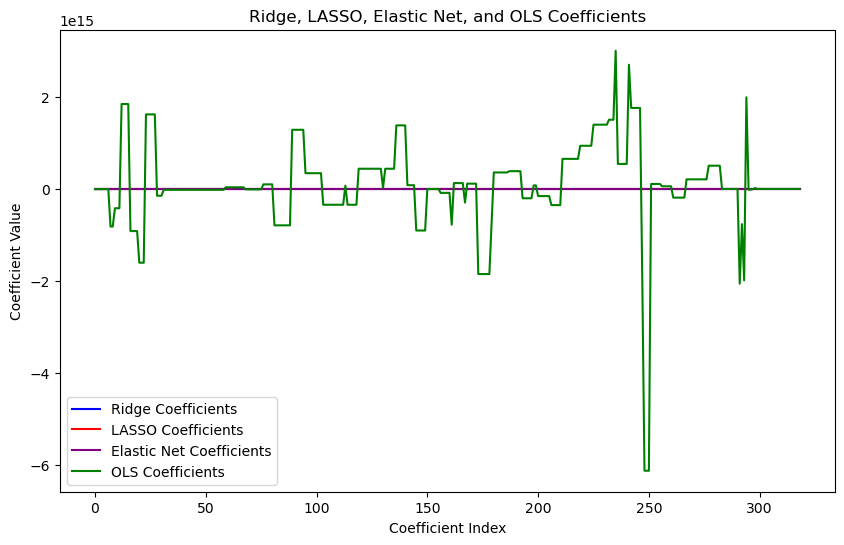

In [5]:
import numpy as np
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV

# Create a pipeline for Elastic Net
elastic_net_pipeline = Pipeline([
    ("preprocessing", ct),
    ("elastic_net", ElasticNet())  # We will tune the hyperparameters
])

# Define the hyperparameters to tune
param_grid = {
    'elastic_net__alpha': [0.001, 0.01, 0.1, 1, 10],  # Alpha values (regularization strength)
    'elastic_net__l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9]  # L1 ratio (0 for L2, 1 for L1, values in between for a mix)
}

# Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(elastic_net_pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X, y)

# Get the best Elastic Net model with tuned hyperparameters
best_elastic_net = grid_search.best_estimator_

# Fit the best model on the full Ames data
best_elastic_net.fit(X, y)
elastic_net_coefs = best_elastic_net.named_steps['elastic_net'].coef_

# Plot coefficients for Ridge, LASSO, and Elastic Net
plt.figure(figsize=(10, 6))
plot_coefficients(ridge_coefs, "Ridge", 'blue')
plot_coefficients(lasso_coefs, "LASSO", 'red')
plot_coefficients(elastic_net_coefs, "Elastic Net", 'purple')
plot_coefficients(ols_coefs, "OLS", 'green')

plt.xlabel("Coefficient Index")
plt.ylabel("Coefficient Value")
plt.legend()
plt.title("Ridge, LASSO, Elastic Net, and OLS Coefficients")
plt.show()
